In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def DFT(f,N):
    f_k = np.zeros(N,dtype=complex)
    for k in np.arange(0,N):
        for n in np.arange(0,N):
            f_k[k] = f_k[k] + f[n]*np.exp(-2*np.pi*1j*k*n/N)
    return f_k
def IDFT(f_k,N):
    f = np.zeros(N,dtype=complex)
    for n in np.arange(0,N):
        for k in np.arange(0,N):
            f[n] = f[n] + f_k[k]*np.exp(2*np.pi*1j*k*n/N)
        f[n] = f[n]/N
    return f

In [32]:
def gauss(x,xc=0,sigma=0.5):
    return np.exp(-0.5*(x-xc)**2/sigma**2)
def der_gauss(x,xc=0,sigma=0.5):
    return -(x-xc)/sigma**2*np.exp(-0.5*(x-xc)**2/sigma**2)
def dummy_derivative(f,N,a):
    df = np.zeros(N)
    for n in np.arange(0,N):
        # Periodic extended
        df[n] = (f[(n+1)%N]-f[(n-1)%N])/(2*a)
    return df

Text(0, 0.5, 'Module of Error on $\\hat{f}(x_n)$')

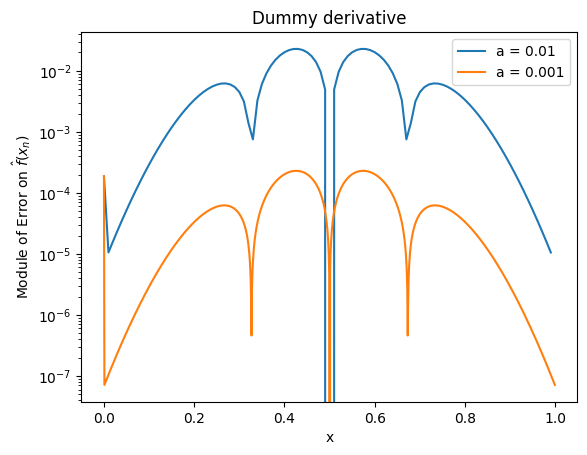

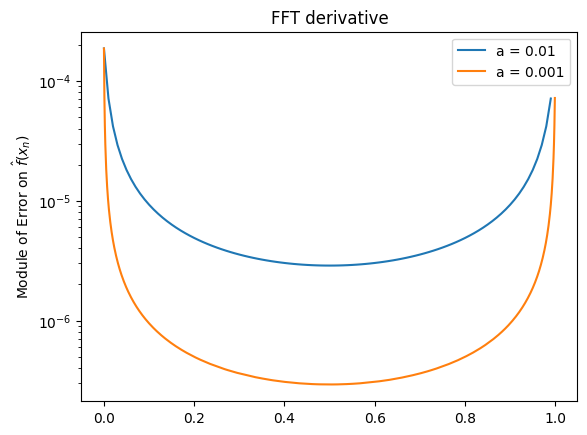

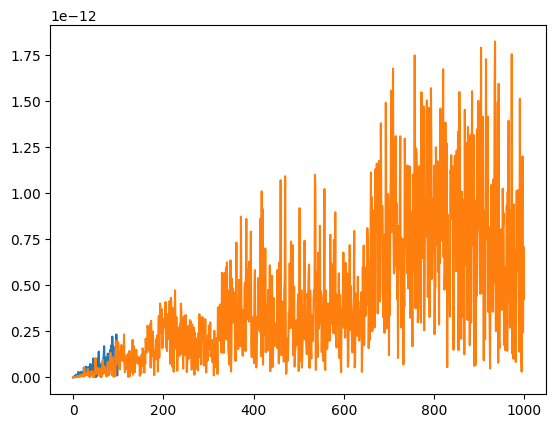

In [33]:
L = 1
xc = 0.5
sigma = 0.1
#qlattice = (2*np.pi/L)*(np.arange(0,N))
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig2, ax3 = plt.subplots()

for N in np.array([100,1000]):
    a = L/N
    xlattice = (np.arange(0,N))*a
    qlattice = np.fft.fftfreq(N)*2*np.pi/a

    f = gauss(xlattice,0.5,0.1)
    
    # FFT derivative
    F = 1j*qlattice*DFT(f,N)
    #F = F
    #f_fft2 = IDFT(F,N)
    f_fft = np.fft.ifft(F)
    #plt.plot(np.real(f_fft))
    #plt.plot(np.real(f_fft2))
    #ax3.plot(np.abs(f_fft-f_fft2))

    # Exact derivative
    f_ = der_gauss(xlattice,xc,sigma)
    F_ = np.fft.fft(f_)

    # Dummy
    df = dummy_derivative(f,N,a)
    dF = np.fft.fft(df)


    #ax.semilogy((np.arange(0,N)), np.abs(F-F_),label="a = "+str(a))
    #ax.plot((np.arange(0,N))*a, (f_),label="a = "+str(a))
    ax1.semilogy((np.arange(0,N))*a, np.abs(df-f_),label="a = "+str(a))
    ax2.semilogy((np.arange(0,N))*a, np.abs(f_fft-f_),label="a = "+str(a))
    #ax2.semilogy((np.arange(0,N))*a, np.abs(f_fft),label="a = "+str(a))
    #ax2.semilogy((np.arange(0,N))*a, np.abs(f_),label="a = "+str(a))

ax1.legend()
ax1.set_title("Dummy derivative")
ax2.set_title("FFT derivative")
ax1.set_xlabel("x")
ax2.legend()
ax1.set_ylabel("Module of Error on $\hat{f}(x_n)$")
ax2.set_ylabel("Module of Error on $\hat{f}(x_n)$")

In [34]:
N/2

500.0

In [35]:
for j in range(0,3):
    print(j)

0
1
2


In [36]:
f = gauss(xlattice,xc,sigma)
F = np.fft.fft(f)
F = 1j*qlattice*F
f_ = der_gauss(xlattice,xc,sigma)
F_ = np.fft.fft(f_)
ax.plot(qlattice, np.abs(F-F_),label="a = "+str(a))

#ax.semilogy(qlattice, np.abs(F_))
#ax.plot(xlattice, np.abs(f_))
#f_ = IDFT(F,N)

#ax.plot(xlattice, np.abs(f))
#ax.plot(xlattice, np.abs(f_))

NameError: name 'ax' is not defined

In [ ]:
ax.plot(1,1)